In [1]:
import json
import os.path

import numpy as np
import pandas as pd
from random import randrange
import collections
import pprint
import matplotlib.pyplot as plt

In [2]:
pp = pprint.PrettyPrinter(indent=2)
%matplotlib inline

In [3]:
# import exhibit-level data

with open('data/scraped_data/exhibits.json', 'r') as f:
    exhibits = json.load(f)

with open('data/entities/exhibits.json', 'r') as f:
    exhibit_entities = json.load(f)

In [5]:
# take a peek at exhibit data

print('Number of exhibits: {}'.format(len(exhibits)))

exhibit_fields = list(exhibits[0].keys())
print('\nExhibit fields: {}'.format(exhibit_fields))

N = randrange(len(exhibits))
rand_exhibit_url = 'www.exploratorium.edu/exhibits/' + exhibit_entities[N]['id']   # WHAT'S THE CORRECT SYNTAX FOR THIS??
print('\nRandom exhibit: {}'.format(rand_exhibit_url))
print('Random exhibit:')
pp.pprint(exhibits[N])

Number of exhibits: 178

Exhibit fields: ['id', 'title', 'aliases', 'location', 'byline', 'collection_id', 'related_id', 'tagline', 'description', 'whats_going_on', 'going_further', 'details', 'phenomena', 'keywords']

Random exhibit: www.exploratorium.edu/exhibits/lumen-illusion
Random exhibit:
{ 'aliases': '',
  'byline': 'Robert Larue (Bob) Miller and Frank Oppenheimer',
  'collection_id': ['reflections', 'seeing-the-light'],
  'description': '',
  'details': '',
  'going_further': '',
  'id': 'duck-into-a-kaleidescope',
  'keywords': ['mirrors'],
  'location': 'Bechtel Gallery 3: Seeing & Reflections',
  'phenomena': ['Image Formation', 'Patterns', 'Reflection', 'Symmetry'],
  'related_id': [ 'look-into-infinity',
                  'anti-gravity-mirror',
                  'giant-mirror',
                  'cylindrical-mirror'],
  'tagline': 'Step inside—and reflect.',
  'title': 'Duck Into a Kaleidoscope',
  'whats_going_on': ''}


In [6]:
# take a peek at exhibit entity data

print('Number of exhibit entity items: {}'.format(len(exhibit_entities)))

exhibit_entity_fields = list(exhibit_entities[0].keys())
print('\nExhibit entity fields: {}'.format(exhibit_entity_fields))

N = randrange(len(exhibit_entities))
rand_exhibit_entities_url = 'www.exploratorium.edu/exhibits/' + exhibit_entities[N]['id']   # SYNTAX??
print('\nRandom exhibit:{}'.format(rand_exhibit_entities_url))
print('Random exhibit entities:')
pp.pprint(exhibit_entities[N])

Number of exhibit entity items: 546

Exhibit entity fields: ['id', 'grouping', 'category', 'entities']

Random exhibit:www.exploratorium.edu/exhibits/aeolian-landscape
Random exhibit entities:
{ 'category': 'byline',
  'entities': [ {'name': 'Ned Kahn', 'salience': 1.0, 'type': 'PERSON'},
                {'name': '1988', 'salience': 0.0, 'type': 'DATE'},
                {'name': '1988', 'salience': 0.0, 'type': 'NUMBER'}],
  'grouping': 'exhibits',
  'id': 'aeolian-landscape'}


In [7]:
# add a 'source' key to the exhibit entity data, and assign a value of 'gcp' to the exisiting entity items

for item in exhibit_entities:
    for entity in item['entities']:
        entity.update({'source': 'gcp'})

In [4]:
# get unique keywords (from scraped data)

keywords = [exhibit['keywords'] for exhibit in exhibits]
keywords = [item for sublist in keywords for item in sublist]
all_keywords = pd.Series(keywords)
keyword_freq = all_keywords.value_counts(sort=True)
unique_keywords = pd.Series(list(set(keywords)))

print('Number of unique exhibit keywords: {}'.format(len(unique_keywords)))
print('\nTop 25 exhibit keyword counts:\n{}'.format(keyword_freq.head(25)))
print('\nUnique exhibit keywords: {}'.format(sorted(unique_keywords.tolist())))

Number of unique exhibit keywords: 114

Top 25 exhibit keyword counts:
mirrors                12
weather                 9
water                   8
eyes                    8
pendulums               5
fog                     4
sand                    4
parabolas               4
spinning                4
evaporation             3
focal point             3
musical instruments     3
magnetic field          3
illusions               3
sun                     3
photography             2
bicycle wheel           2
model                   2
amplification           2
embryology              2
cooperation             2
genetics                2
complexity              2
perspective             2
magnet                  2
dtype: int64

Unique exhibit keywords: ['CMY', 'CMY retina', 'Chladni', 'DNA', "Huygens' principle", 'Marine', 'Migrations', 'Neon', "Newton's Laws", 'Ocean', 'Pacific', 'RGB', 'Sharks', 'Stroop effect', 'Turtles', 'Whales', 'acoustics', 'adaptation', 'afterimage', 'air currents

In [7]:
# save keywords to a csv file

path = 'data/keywords'
if not os.path.exists(path):
    os.makedirs(path)

filepath = os.path.join(path, 'keywords.csv')
if os.path.exists(filepath):
    os.remove(filepath)

unique_keywords.to_csv(filepath, index=False)

In [9]:
# add entries corresponding to each instance of each keyword above (some keywords correspond to more than one exhibit)
# to the exhibit_entiteis data

for exhibit in exhibits:
    if len(exhibit['keywords']) == 0:
        continue
    exhibit_id = exhibit['id']
    these_entities = []
    for keyword in exhibit['keywords']:
        these_entities.append(
            {'name': keyword,
             'type': 'keyword',
             'salience': 1.0,
             'source': 'exploratorium.com'
            }
        )
    exhibit_entities.append(
            {'id': exhibit_id,
             'grouping': 'exhibits',
             'category': 'exhibit',
             'entities': these_entities
            }
    )

In [6]:
# find unique phenomena (from scraped data)

phenomena = [exhibit['phenomena'] for exhibit in exhibits]
phenomena = [item for sublist in phenomena for item in sublist]
all_phenomena = pd.Series(phenomena)
phenomenon_freq = all_phenomena.value_counts(sort=True)
unique_phenomena = pd.Series(list(set(phenomena)))

print('Number of unique exhibit phenemena: {}'.format(len(unique_phenomena)))
print('\nTop 25 exhibit phenomena counts:\n{}'.format(phenomenon_freq.head(25)))
print('\nUnique exhibit phenomena: {}'.format(sorted(unique_phenomena.tolist())))

Number of unique exhibit phenemena: 144

Top 25 exhibit phenomena counts:
Patterns                                    19
Reflection                                  19
Color                                       18
Resonance                                   15
Image Formation                             13
Techniques to Make the Invisible Visible     8
Fluid Mechanics                              7
Symmetry                                     7
Color Mixing                                 7
Shadows                                      7
Motion: Periodic Motion                      7
Motion: Pendular Motion                      7
Wave Excitation                              7
Natural Frequency                            6
Wind                                         6
Feedback                                     6
Nonlinear Behavior                           6
Turbulent Flow                               5
Oscillation                                  5
Light Production                 

In [8]:
# save phenomena to a csv file

path = 'data/phenomena'
if not os.path.exists(path):
    os.makedirs(path)

filepath = os.path.join(path, 'phenomena.csv')
if os.path.exists(filepath):
    os.remove(filepath)

unique_phenomena.to_csv(filepath, index=False)

In [11]:
# add entries corresponding to each instance of each phenomenon above (some phenomena correspond to more than one exhibit)
# to the exhibit_entiteis data

for exhibit in exhibits:
    if len(exhibit['phenomena']) == 0:
        continue
    exhibit_id = exhibit['id']
    these_entities = []
    for phenomenon in exhibit['phenomena']:
        these_entities.append(
            {'name': phenomenon,
             'type': 'phenomenon',
             'salience': 1.0,
             'source': 'exploratorium.com'
            }
        )
    exhibit_entities.append(
            {'id': exhibit_id,
             'grouping': 'exhibits',
             'category': 'exhibit',
             'entities': these_entities
            }
    )

In [12]:
# analyze salience and type of entities

entity_sublists = [item['entities'] for item in exhibit_entities]
entities = [item for sublist in entity_sublists for item in sublist]

saliences = [entity['salience'] for entity in entities]
saliences = pd.Series(saliences)
undef_salience = pd.isna(saliences).sum()

print('There are {} undefined entity salience values in exhibit_entities'.format(undef_salience))

types = [entity['type'] for entity in entities]
types = pd.Series(types)
undef_type = pd.isna(types).sum()

print('There are {} undefined entity type values in exhibit_entities'.format(undef_type))

There are 0 undefined entity salience values in exhibit_entities
There are 0 undefined entity type values in exhibit_entities


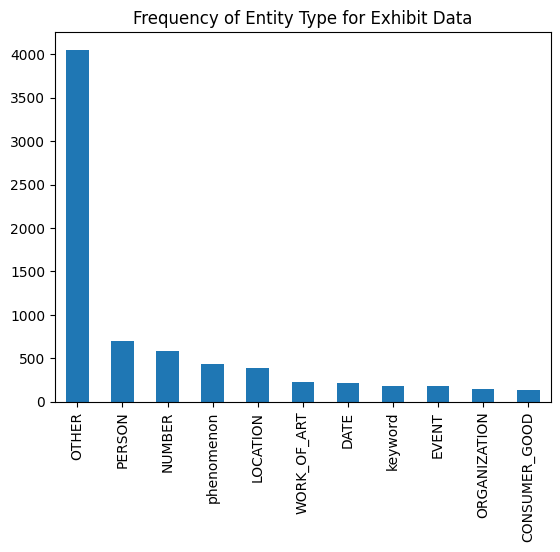

In [13]:
ax = types.value_counts().plot(kind='bar')
ax.set_title('Frequency of Entity Type for Exhibit Data')
plt.show()

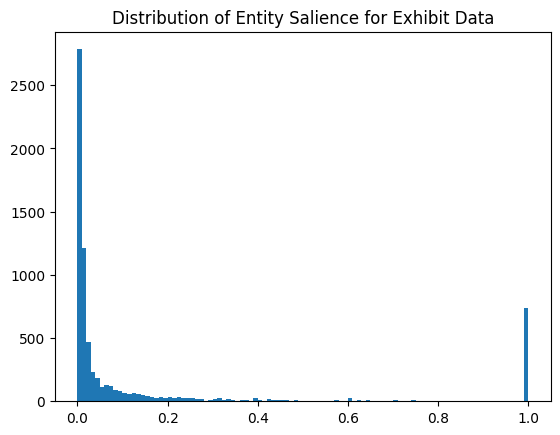

800 entities have salience = 0
737 entities have salience = 1


In [14]:
plt.hist(saliences, bins=100)
plt.title('Distribution of Entity Salience for Exhibit Data')
plt.show()

low_salience = pd.Series([np.abs(salience) < 0.0001 for salience in saliences]).sum()
high_salience = pd.Series([np.abs(salience) > 0.9999 for salience in saliences]).sum()
print('{} entities have salience = 0'.format(low_salience))
print('{} entities have salience = 1'.format(high_salience))

In [15]:
# identify items in exhibit_entities with duplicate entity names

def has_dupes(item):
    names = [item['entities'][k]['name'] for k in range(len(item['entities']))]
    if len(names) > len(list(set(names))):
        return True
    else:
        return False

num_dupes = 0
for item in exhibit_entities:
    num_dupes += has_dupes(item)

print('There are {} items in exhibit_entities with duplicated entity names:\n'.format(num_dupes))
N = randrange(num_dupes)
dupes = [item for item in exhibit_entities if has_dupes(item)]
print('Random such item:\n')
pp.pprint(dupes[N])

There are 309 items in exhibit_entities with duplicated entity names:

Random such item:

{ 'category': 'byline',
  'entities': [ { 'name': 'David Torgersen',
                  'salience': 1.0,
                  'source': 'gcp',
                  'type': 'PERSON'},
                { 'name': '2019',
                  'salience': 0.0,
                  'source': 'gcp',
                  'type': 'DATE'},
                { 'name': '2019',
                  'salience': 0.0,
                  'source': 'gcp',
                  'type': 'NUMBER'}],
  'grouping': 'exhibits',
  'id': 'unseen-stories'}


In [16]:
# define merge function
# merge on entity name
# salience = max(salience for each dupe entity name)
# type = from (type for each dupe entity name), choose the one with smallest index in ordered_types

ordered_types = ['phenomenon',
                 'keyword',
                 'PERSON',
                 'DATE',
                 'ORGANIZATION',
                 'LOCATION',
                 'NUMBER',
                 'EVENT',
                 'CONSUMER_GOOD',
                 'WORK_OF_ART',
                 'OTHER']

def choose_type(types):
    for type in ordered_types:
        if type in types:
            return type

def merge_entities(item):
    if not has_dupes(item):
        return item
    new_item = {
        'id': item['id'],
        'grouping': item['grouping'],
        'category': item['category'],
    }
    names = [item['entities'][k]['name'] for k in range(len(item['entities']))]
    merged_entities = []
    for name, count in collections.Counter(names).items():
        types = [item['entities'][k]['type'] for k in range(len(item['entities'])) if item['entities'][k]['name'] == name]
        saliences = [item['entities'][k]['salience'] for k in range(len(item['entities'])) if item['entities'][k]['name'] == name]
        this_entity = {}
        this_entity['name'] = name
        this_entity['salience'] = np.max(saliences)
        this_entity['type'] = choose_type(types)
        this_entity['source'] = 'merge'
        merged_entities.append(this_entity)
    new_item.update({'entities': merged_entities})
    return new_item

In [17]:
# merge exhibit extity data on entity name

exhibit_entities_merged = []
for item in exhibit_entities:
    merged = merge_entities(item)
    exhibit_entities_merged.append(merged)

num_dupes = 0
for item in exhibit_entities_merged:
    num_dupes += has_dupes(item)

print('There are {} items in exhibit_entities_merged with duplicated entity names'.format(num_dupes))

There are 0 items in exhibit_entities_merged with duplicated entity names


In [18]:
pp.pprint(exhibit_entities_merged)

[ { 'category': 'byline',
    'entities': [ { 'name': 'Charles Glorioso',
                    'salience': 0.6612948775291443,
                    'source': 'gcp',
                    'type': 'PERSON'},
                  { 'name': 'Erik Thogersen',
                    'salience': 0.3387051224708557,
                    'source': 'gcp',
                    'type': 'PERSON'}],
    'grouping': 'exhibits',
    'id': 'circuit-workbench'},
  { 'category': 'byline',
    'entities': [ { 'name': 'Ned Kahn',
                    'salience': 1.0,
                    'source': 'merge',
                    'type': 'PERSON'},
                  { 'name': '1986',
                    'salience': 0.0,
                    'source': 'merge',
                    'type': 'DATE'}],
    'grouping': 'exhibits',
    'id': 'tornado'},
  { 'category': 'byline',
    'entities': [ { 'name': 'Tom Tompkins',
                    'salience': 0.60121750831604,
                    'source': 'merge',
                    'ty

In [19]:
# only exhibits with rich enough language data (on exploratorium.com) will be used for training the model
# here we quantify the amount of language data available for each exhibit

language_fields = ['description', 'whats_going_on', 'going_further', 'details']
labels = ['keywords', 'phenomena']

exhibit_data = []
for exhibit in exhibits:
    this_exhibit = {
        'id': exhibit['id']
    }
    for field in language_fields:
        this_exhibit.update({'len_'+field: len(exhibit[field])})
    for label in labels:
        this_exhibit.update({'num_'+label: len(exhibit[label])})
    exhibit_data.append(this_exhibit)

exhibit_data_df = pd.DataFrame(exhibit_data)
exhibit_data_df['len_about'] = exhibit_data_df.len_whats_going_on + \
                               exhibit_data_df.len_going_further + \
                               exhibit_data_df.len_details
exhibit_data_df.drop(columns=['len_whats_going_on', 'len_going_further', 'len_details'], axis=0, inplace=True)

no_lang = exhibit_data_df[exhibit_data_df.len_description + exhibit_data_df.len_about == 0]

print('There are {} exhibits without language data'.format(len(no_lang)))

There are 40 exhibits without language data


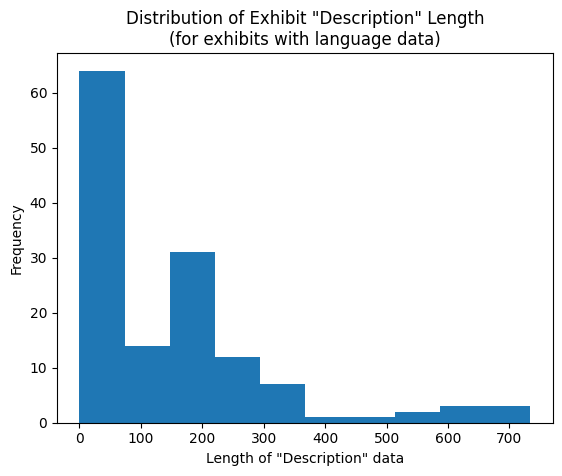

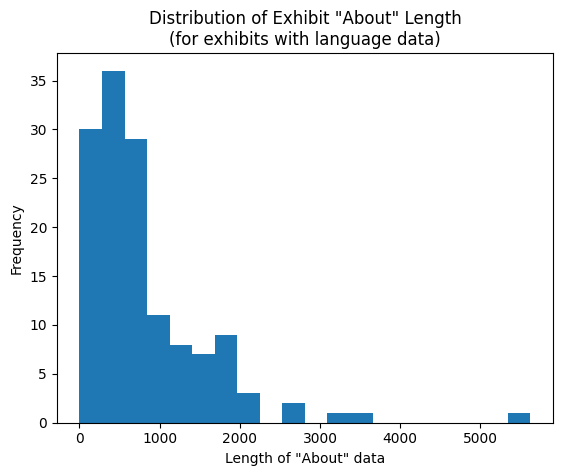

In [38]:
plt.hist(exhibit_data_df['len_description'][exhibit_data_df.len_description + exhibit_data_df.len_about != 0])
plt.xlabel('Length of "Description" data')
plt.ylabel('Frequency')
plt.title('Distribution of Exhibit "Description" Length\n(for exhibits with language data)')
plt.show()

plt.hist(exhibit_data_df['len_about'][exhibit_data_df.len_description + exhibit_data_df.len_about != 0], bins=20)
plt.xlabel('Length of "About" data')
plt.ylabel('Frequency')
plt.title('Distribution of Exhibit "About" Length\n(for exhibits with language data)')
plt.show()

In [25]:
# aggregate exhibit language entity data by exhibit id

language_fields.append('exhibit')

def merge_ent(exhibit_id):
    this_exhibit_entities = {
        'id': exhibit_id
    }
    for item in exhibit_entities_merged:
        if item['id'] == exhibit_id and item['category'] in language_fields:
            this_exhibit_entities.update({item['category']: item['entities']}
            )
    return this_exhibit_entities

entities_by_exhibit = []
for exhibit in exhibits:
    entities_by_exhibit.append(merge_ent(exhibit['id']))

pp.pprint(entities_by_exhibit)

[ { 'exhibit': [ { 'name': 'Attention',
                   'salience': 1.0,
                   'source': 'exploratorium.com',
                   'type': 'phenomenon'},
                 { 'name': 'Color',
                   'salience': 1.0,
                   'source': 'exploratorium.com',
                   'type': 'phenomenon'},
                 { 'name': 'Information Processing and Encoding',
                   'salience': 1.0,
                   'source': 'exploratorium.com',
                   'type': 'phenomenon'},
                 { 'name': 'Reaction Time',
                   'salience': 1.0,
                   'source': 'exploratorium.com',
                   'type': 'phenomenon'},
                 { 'name': 'Selective Awareness',
                   'salience': 1.0,
                   'source': 'exploratorium.com',
                   'type': 'phenomenon'}],
    'id': 'color-conflicts'},
  { 'details': [ { 'name': 'hole',
                   'salience': 0.5284079313278198,
       

In [26]:
# quantify the number of (language_v1) entities returned for each exhibit

exhibit_entity_data = []

for exhibit in entities_by_exhibit:
    this_exhibit = {
        'id': exhibit['id']
    }
    for field in language_fields:
        try:
            this_exhibit.update({'num_'+field: len(exhibit[field])})
        except KeyError:
            this_exhibit.update({'num_'+field: 0})
    exhibit_entity_data.append(this_exhibit)

exhibit_entity_data_df = pd.DataFrame(exhibit_entity_data)
exhibit_entity_data_df.head()

,id,num_description,num_whats_going_on,num_going_further,num_details,num_exhibit
0,color-conflicts,0,0,0,0,5
1,cloud-rings,0,0,0,12,2
2,circuit-workbench,0,0,0,0,3
3,colored-circles,5,0,0,0,0
4,cloud-chamber,7,50,17,0,6


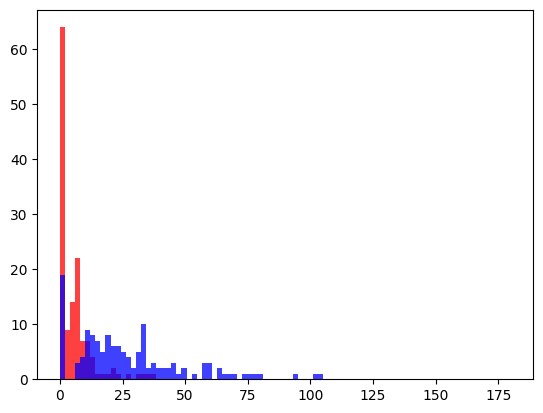

In [123]:
df['total_ent'] = df.num_description + df.num_whats_going_on + df.num_going_further + df.num_details
df['num_about'] = df.total_ent - df.num_description
has_ents = df[['id', 'num_description', 'num_about']][df.total_ent > 0]
# has_ents.head()

bins = np.linspace(0, 180, 90)
plt.hist(has_ents.num_description, bins, color='r', alpha=0.75)
plt.hist(has_ents.num_about, bins, color='b', alpha=0.75)
plt.show()

In [413]:
# the entities returned for the byline category should provide the names of the exhibit creators and the date it was created
# these are the items which have entities that don't fall into the PERSON or DATE type

n = 0
for item in exhibit_entities_merged:
    if item['category'] == 'byline':
        types = [item['entities'][k]['type'] for k in range(len(item['entities']))]
        if any(type not in ['PERSON', 'DATE'] for type in types):
            pp.pprint(item)
            n += 1
print('\nThere are {} items in exhibit_entities_merged with additional byline entity types'.format(n))

{ 'category': 'byline',
  'entities': [ { 'name': 'Artist',
                  'salience': 0.816230058670044,
                  'source': 'merge',
                  'type': 'PERSON'},
                { 'name': 'Residence Douglas Hollis',
                  'salience': 0.18376991152763367,
                  'source': 'merge',
                  'type': 'OTHER'},
                { 'name': '1976',
                  'salience': 0.0,
                  'source': 'merge',
                  'type': 'DATE'}],
  'grouping': 'exhibits',
  'id': 'aeolian-harp'}
{ 'category': 'byline',
  'entities': [ { 'name': 'Denise King',
                  'salience': 0.7063267230987549,
                  'source': 'merge',
                  'type': 'PERSON'},
                { 'name': 'Charles Carlson',
                  'salience': 0.22174805402755737,
                  'source': 'merge',
                  'type': 'PERSON'},
                { 'name': 'Sitara Cave',
                  'salience': 0.071925252676010

In [425]:
# export merged exhibit entities

with open('data/entities/exhibits_merge_name.json', 'w') as f:
    f.write(json.dumps(exhibit_entities_merged, indent=2))

In [415]:
# import gallery-level data

with open('data/scraped_data/galleries.json', 'r') as f:
    galleries = json.load(f)

with open('data/entities/galleries.json', 'r') as f:
    gallery_entities = json.load(f)

In [416]:
# take a peek at gallery data

print('Number of galleries: {}'.format(len(galleries)))

gallery_fields = list(galleries[0].keys())
print('\nGallery fields: {}'.format(gallery_fields))

N = randrange(len(galleries))
rand_gallery_url = 'www.exploratorium.edu/visit/' + exhibit_entities[N]['id']   # WHAT'S THE CORRECT SYNTAX FOR THIS??
print('\nRandom gallery: {}'.format(rand_gallery_url))
print('Random gallery:')
pp.pprint(galleries[N])

Number of galleries: 6

Gallery fields: ['id', 'title', 'tagline', 'description', 'curator_url', 'curator_statement']

Random gallery: www.exploratorium.edu/visit/magnetic-fluid-patterns
Random gallery:
{ 'curator_statement': 'This second-floor, indoor/outdoor exhibition space '
                       'features spectacular views of the Bay and San '
                       'Francisco’s northern waterfront, as well as its urban, '
                       'downtown cityscape. The Fisher Bay Observatory '
                       'Gallery  and Terrace use these views as an entry point '
                       'for investigations of the history and dynamic '
                       'processes in the local landscape, and the human '
                       'impact. The exhibits, artworks, and instruments here '
                       'probe the environment from multiple perspectives, such '
                       'as physical and geographic sciences, ecology, '
                       'astronomy, 

In [417]:
# take a peek at gallery entity data

print('Number of gallery entity items: {}'.format(len(gallery_entities)))

gallery_entity_fields = list(gallery_entities[0].keys())
print('\nGallery entity fields: {}'.format(gallery_entity_fields))

N = randrange(len(gallery_entities))
rand_gallery_entities_url = 'www.exploratorium.edu/exhibits/' + gallery_entities[N]['id']   # SYNTAX??
print('\nRandom gallery:{}'.format(rand_gallery_entities_url))
print('Random gallery entities:')
pp.pprint(gallery_entities[N])

Number of gallery entity items: 18

Gallery entity fields: ['id', 'grouping', 'category', 'entities']

Random gallery:www.exploratorium.edu/exhibits/gallery-3
Random gallery entities:
{ 'category': 'description',
  'entities': [ { 'name': 'light',
                  'salience': 0.31979408860206604,
                  'type': 'OTHER'},
                { 'name': 'eyes',
                  'salience': 0.2672935426235199,
                  'type': 'OTHER'},
                { 'name': 'aspect',
                  'salience': 0.14684730768203735,
                  'type': 'OTHER'},
                { 'name': 'world',
                  'salience': 0.07965520769357681,
                  'type': 'LOCATION'},
                { 'name': 'phenomena',
                  'salience': 0.05587542802095413,
                  'type': 'OTHER'},
                { 'name': 'way',
                  'salience': 0.04601622745394707,
                  'type': 'OTHER'},
                { 'name': 'light',
                

In [418]:
# add a 'source' key to the gallery entity data, and assign a value of 'gcp' to the exisiting entity items

for item in gallery_entities:
    for entity in item['entities']:
        entity.update({'source': 'gcp'})

In [419]:
# analyze salience and type of entities

entity_sublists = [item['entities'] for item in gallery_entities]
entities = [item for sublist in entity_sublists for item in sublist]

saliences = [entity['salience'] for entity in entities]
saliences = pd.Series(saliences)
undef_salience = pd.isna(saliences).sum()

print('There are {} undefined entity salience values in gallery_entities'.format(undef_salience))

types = [entity['type'] for entity in entities]
types = pd.Series(types)
undef_type = pd.isna(types).sum()

print('There are {} undefined entity type values in gallery_entities'.format(undef_type))

There are 0 undefined entity salience values in gallery_entities
There are 0 undefined entity type values in gallery_entities


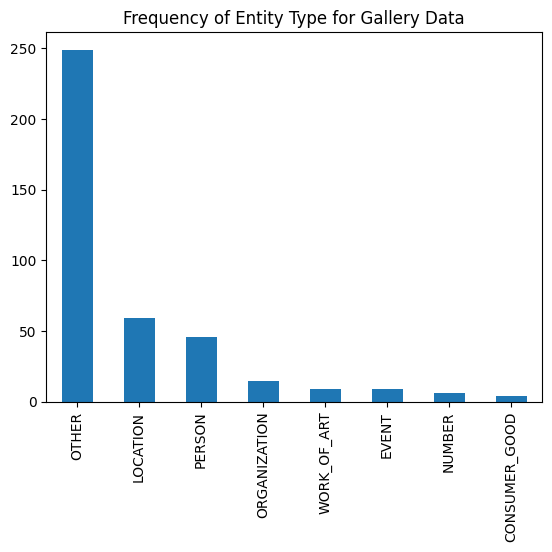

In [420]:
ax = types.value_counts().plot(kind='bar')
ax.set_title('Frequency of Entity Type for Gallery Data')
plt.show()

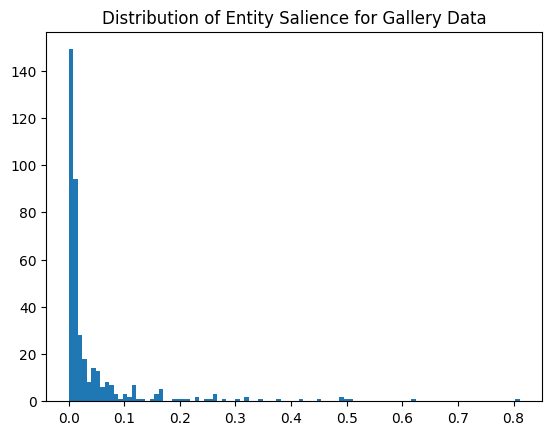

6 entities have salience = 0
0 entities have salience = 1


In [421]:
plt.hist(saliences, bins=100)
plt.title('Distribution of Entity Salience for Gallery Data')
plt.show()

low_salience = pd.Series([np.abs(salience) < 0.0001 for salience in saliences]).sum()
high_salience = pd.Series([np.abs(salience) > 0.9999 for salience in saliences]).sum()
print('{} entities have salience = 0'.format(low_salience))
print('{} entities have salience = 1'.format(high_salience))

In [422]:
# identify items in gallery_entities with duplicate entity names

num_dupes = 0
for item in gallery_entities:
    num_dupes += has_dupes(item)

print('There are {} items in gallery_entities with duplicated entity names:\n'.format(num_dupes))
N = randrange(num_dupes)
dupes = [item for item in gallery_entities if has_dupes(item)]
print('Random such item:\n')
pp.pprint(dupes[N])

There are 8 items in gallery_entities with duplicated entity names:

Random such item:

{ 'category': 'curator_statement',
  'entities': [ { 'name': 'appreciation',
                  'salience': 0.16007357835769653,
                  'source': 'gcp',
                  'type': 'OTHER'},
                { 'name': 'visitors',
                  'salience': 0.11568005383014679,
                  'source': 'gcp',
                  'type': 'PERSON'},
                { 'name': 'Gallery',
                  'salience': 0.08085287362337112,
                  'source': 'gcp',
                  'type': 'OTHER'},
                { 'name': 'world',
                  'salience': 0.07394825667142868,
                  'source': 'gcp',
                  'type': 'LOCATION'},
                { 'name': 'ways',
                  'salience': 0.0651792362332344,
                  'source': 'gcp',
                  'type': 'OTHER'},
                { 'name': 'laboratory',
                  'salience': 0.049201

In [423]:
# merge gallery extity data on entity name

gallery_entities_merged = []
for item in gallery_entities:
    merged = merge_entities(item)
    gallery_entities_merged.append(merged)

num_dupes = 0
for item in gallery_entities_merged:
    num_dupes += has_dupes(item)

print('There are {} items in gallery_entities_merged with duplicated entity names'.format(num_dupes))

There are 0 items in gallery_entities_merged with duplicated entity names


In [426]:
# export merged gallery entities

with open('data/entities/galleries_merge_name.json', 'w') as f:
    f.write(json.dumps(gallery_entities_merged, indent=2))